# Application of Machine Learning Techniques in Credit Card Fraud Detection

> **XGBoost**

Another boosting approach that attempts to merge the weak learners into a strong learner is gradient boosting. During the learning process, weak learners are produced. The weak learner predicts the values or class label at each stage of the process, calculates the difference between real value and the predicted value. It builds a new weak learner based on the loss, and the weak learner learns on the remaining mistakes. This procedure goes on until a specific threshold is reached. In terms of regularization, XGBoost outperforms gradient boosting. Thus, it lessens overfitting. Since XGboost supports parallel processing, it is significantly quicker than conventional gradient boosting. XGBoost offers the capacity to handle missing data right out of the box. Gradient boosting is a greedy method since it stops splitting the node once it suffers a loss, whereas xgboost divides up to the provided maximum depth.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris 
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
print('All libraries imported')

All libraries imported


In [2]:
from pandas_profiling import ProfileReport

In [3]:
data = pd.read_csv('creditcard.csv')

In [1]:
#ProfileReport(data, title="Pandas Profiling Report")

In [88]:
data.shape

(284807, 31)

In [89]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

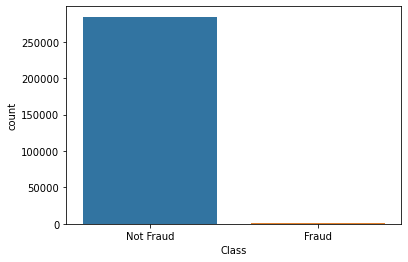

In [91]:
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [92]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

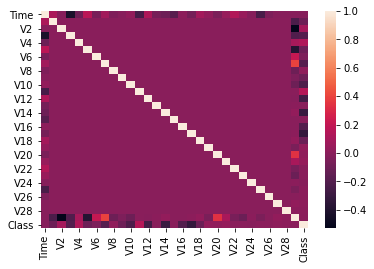

In [93]:
sns.heatmap(data.corr(), annot = False)
plt.show()

In [94]:
correlations = data.corr()['Class'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(6))

Most Positive Correlations: 
 V19      0.034783
V21      0.040413
V2       0.091289
V4       0.133447
V11      0.154876
Class    1.000000
Name: Class, dtype: float64

Most Negative Correlations: 
 V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
Name: Class, dtype: float64


# Data Pre-processing

## Data Standardization

Standardizing the features refers to rescaling the features so that they will have the properties of
a standard normal distribution with a mean of 0 and standard deviation of 1. I performed standardization on the 'Amount' feature using
StandardScalar in the scikit-learn library.

### Before standardization

In [95]:
data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [96]:
from sklearn.preprocessing import StandardScaler
data[['Amount']] = StandardScaler().fit_transform(data[['Amount']])

### After standardization

In [97]:
data['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

## Data Splittig using Random seed

A random seed is used to ensure the same data split each time the code is excecuted. 

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x = data.drop("Class", axis =1)
y = data[["Class"]]

In [100]:
x.shape

(284807, 30)

In [101]:
y.shape

(284807, 1)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) # x = features, y = target

In [103]:
x_train.shape

(199364, 30)

In [104]:
x_test.shape

(85443, 30)

In [105]:
y_train.shape

(199364, 1)

In [106]:
y_test.shape

(85443, 1)

## Data Resampling

The dataset is highly unbalanced. To tackle this problem, I used resampling techniques such as: <br>

-  **Random Undersampling**
-  **Random Oversampling** .
-  **SMOTE**  <br>
-  **Under-Sampling: Tomek Links Removal**  
-  **Combination of SMOTE and undersampling**<br>

Implemented these on the training data separately to make it balanced <br>

However as a control we will run the model first with no resmapling techiniques and ananlyze the results, this will be done with the other algorithms. 

 

## 1. XG Boost with no Resampling

## Hyper parameter search for XG Boost

Here i used RandomizedSearchCV instead of GridSearchCV

In [107]:
import xgboost as xgb
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [108]:
xgb = xgb.XGBClassifier(eval_metric='mlogloss')

In [109]:
xgb_params = {'learning_rate': [0.05, 0.1, 0.3, 0.5], #so called `eta` value
              'max_depth': range(3,10,1),
              'min_child_weight': [5,6,7,8,9],
              'subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              'colsample_bytree': [0.1,0.25,0.3,0.4,0.55,0.6,0.75,0.8,0.9],
              'n_estimators': range(100, 1500, 100), #number of trees, change it to 1000 for better results 
              #n_estimators is how many round of boosting
              }



In [50]:
clf = GridSearchCV(xgb, xgb_params, cv = 10, scoring ='roc_auc')
rnd_search = RandomizedSearchCV(xgb, xgb_params, cv = 10, scoring = 'accuracy')

In [101]:
rnd_search.fit(x_train, y_train)
#clf.fit(x_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [110]:
print(rnd_search.best_params_)

{'subsample': 0.9, 'n_estimators': 1200, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.25}


### Fitting the model

In [111]:
classifier1 = xgboost.XGBClassifier(subsample = 0.9, n_estimators = 1200, min_child_weight = 6, max_depth = 5, learning_rate = 0.1, colsample_bytree = 0.25)

model1 = classifier1.fit(x_train, y_train)


[23:53:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Evaluation

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

In [113]:
prediction1 = model1.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction1))

Accuracy Score:  0.9996371850239341


### Confusion Matrix

In [114]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
confusion_matrix(y_test, prediction1)

array([[85302,     5],
       [   26,   110]], dtype=int64)

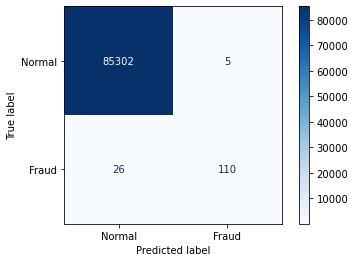

In [115]:
plot_confusion_matrix(model1, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1, digits=4)) 

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9565    0.8088    0.8765       136

    accuracy                         0.9996     85443
   macro avg     0.9781    0.9044    0.9382     85443
weighted avg     0.9996    0.9996    0.9996     85443



### Precision-Recall Curve

In [117]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

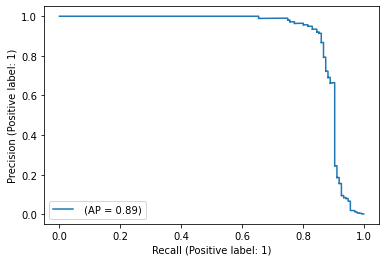

In [118]:
plot_precision_recall_curve(model1, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

In [119]:
from sklearn.metrics import plot_roc_curve, roc_curve

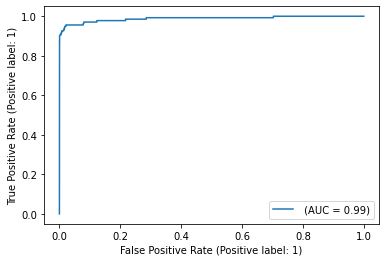

In [120]:
plot_roc_curve(model1, x_test, y_test, name = '')
plt.show()

# 2. XG Boost with Random Under Sampling

In [121]:
from imblearn import under_sampling

In [122]:
from imblearn.under_sampling import RandomUnderSampler

In [123]:
rus = RandomUnderSampler(random_state = 0)
x_under, y_under = rus.fit_resample(x_train, y_train)

In [124]:
x_under.shape

(712, 30)

In [125]:
y_under.shape

(712, 1)

In [126]:
y_under.Class.value_counts()

0    356
1    356
Name: Class, dtype: int64

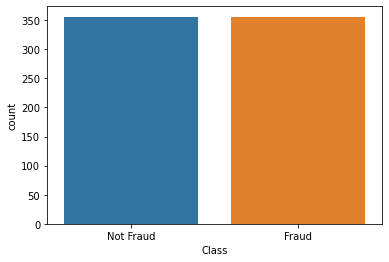

In [127]:
g = sns.countplot(y_under['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

Both majority and minority samples are now equal with 356 instances

### Parameter search 

Using the already created GridSearchCV, we will fit it with the new under sampled feature and target variables and find the best C values from the initial list above

In [131]:
rnd_search.fit(x_under, y_under)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [132]:
print(rnd_search.best_params_)

{'subsample': 0.5, 'n_estimators': 1300, 'min_child_weight': 8, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.4}


### Fitting the model

In [134]:
classifier2 = xgboost.XGBClassifier(subsample = 0.5, n_estimators = 1300, min_child_weight = 8, max_depth = 5, learning_rate = 0.05, colsample_bytree = 0.4)
model2 = classifier2.fit(x_under, y_under)

[11:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Evaluation

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

In [136]:
prediction2 = model2.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction2))

Accuracy Score:  0.9603361305197617


### Confusion Matrix

In [137]:
confusion_matrix(y_test, prediction2)

array([[81927,  3380],
       [    9,   127]], dtype=int64)

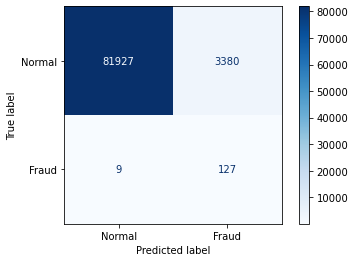

In [138]:
plot_confusion_matrix(model2, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [139]:
print(classification_report(y_test, prediction2, digits = 4))

              precision    recall  f1-score   support

           0     0.9999    0.9604    0.9797     85307
           1     0.0362    0.9338    0.0697       136

    accuracy                         0.9603     85443
   macro avg     0.5181    0.9471    0.5247     85443
weighted avg     0.9984    0.9603    0.9783     85443



### Precision-Recall Curve

In [140]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction2)

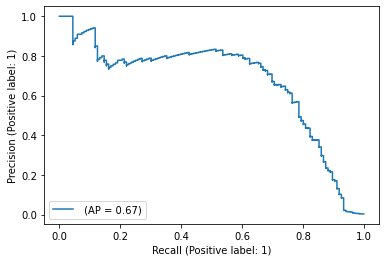

In [141]:
plot_precision_recall_curve(model2, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

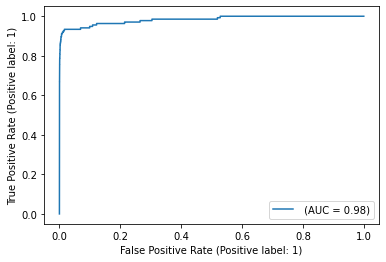

In [142]:
plot_roc_curve(model2, x_test, y_test, name = '')
plt.show()

# 3. XGBoost with Random Over Sampling

In [143]:
from imblearn.over_sampling import RandomOverSampler

In [144]:
ros = RandomOverSampler(random_state = 0)
x_over, y_over = ros.fit_resample(x_train,y_train)

In [145]:
x_over.shape

(398016, 30)

In [146]:
y_over.shape

(398016, 1)

In [147]:
y_over.Class.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

In [148]:
y_train.Class.value_counts()

0    199008
1       356
Name: Class, dtype: int64

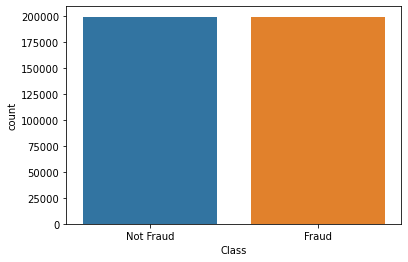

In [149]:
g = sns.countplot(y_over['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

### Parameter Search

In [152]:
rnd_search.fit(x_over, y_over)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [153]:
print(rnd_search.best_params_)

{'subsample': 0.7, 'n_estimators': 1200, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.1}


### Fitting the model

In [154]:
classifier3 = xgboost.XGBClassifier(subsample =  0.7, n_estimators =  1200, min_child_weight = 5, max_depth = 6, learning_rate =  0.3, colsample_bytree = 0.1)
model3 = classifier3.fit(x_over, y_over)

[22:52:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluation

In [155]:
prediction3 = model3.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction3))

Accuracy Score:  0.9996254813150287


### Confusion Matrix 

In [156]:
confusion_matrix(y_test, prediction3)

array([[85295,    12],
       [   20,   116]], dtype=int64)

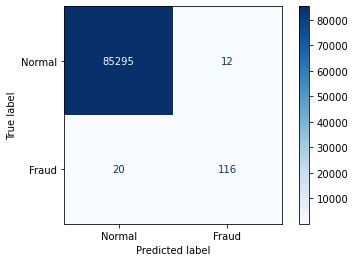

In [157]:
plot_confusion_matrix(model3, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification report

In [158]:
print(classification_report(y_test, prediction3, digits = 4))

              precision    recall  f1-score   support

           0     0.9998    0.9999    0.9998     85307
           1     0.9062    0.8529    0.8788       136

    accuracy                         0.9996     85443
   macro avg     0.9530    0.9264    0.9393     85443
weighted avg     0.9996    0.9996    0.9996     85443



### Precision-Recall Curve

In [159]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction3)

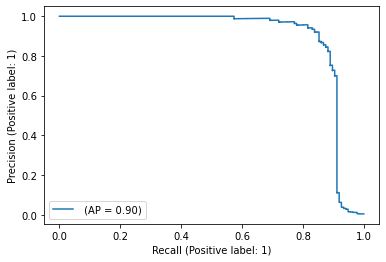

In [160]:
plot_precision_recall_curve(model3, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

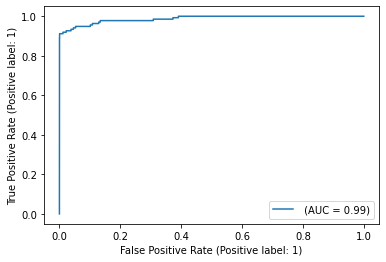

In [161]:
plot_roc_curve(model3, x_test, y_test, name = '')
plt.show()

# 4. Linear Regression with  Synthetic Minority Oversampling Technique         SMOTE

In [110]:
from imblearn.over_sampling import SMOTE 

In [111]:
smt = SMOTE(random_state = 0)

# fit predictor and target variable
x_train_SMOTE, y_train_SMOTE = smt.fit_resample(x_train, y_train)
print('Original dataset shape for y  \n', y.Class.value_counts())
print('Resample dataset shape for y \n', y_train_SMOTE.Class.value_counts())

Original dataset shape for y  
 0    284315
1       492
Name: Class, dtype: int64
Resample dataset shape for y 
 0    199008
1    199008
Name: Class, dtype: int64


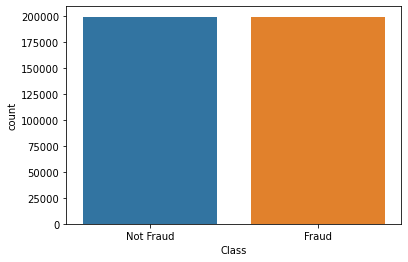

In [112]:
g = sns.countplot(y_train_SMOTE['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

### Parameter search

In [75]:
rnd_search.fit(x_train_SMOTE, y_train_SMOTE)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [76]:
print(rnd_search.best_params_)

{'subsample': 0.9, 'n_estimators': 1300, 'min_child_weight': 6, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.25}


In [113]:
classifier4 = xgboost.XGBClassifier(subsample =  0.9, n_estimators = 1300, min_child_weight = 6, max_depth =  7, learning_rate =  0.05, colsample_bytree = 0.25)
model4 = classifier4.fit(x_train_SMOTE, y_train_SMOTE)

[12:56:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluation

In [114]:
prediction4 = model4.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction4))

Accuracy Score:  0.9994616293903538


### Confusion Matrix

In [115]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [116]:
confusion_matrix(y_test, prediction4)

array([[85277,    30],
       [   16,   120]], dtype=int64)

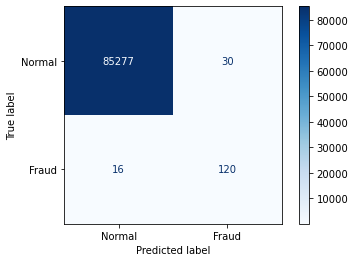

In [117]:
plot_confusion_matrix(model4, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [79]:
print(classification_report(y_test, prediction4, digits = 4))

              precision    recall  f1-score   support

           0     0.9998    0.9996    0.9997     85307
           1     0.8000    0.8824    0.8392       136

    accuracy                         0.9995     85443
   macro avg     0.8999    0.9410    0.9194     85443
weighted avg     0.9995    0.9995    0.9995     85443



### Precision-Recall Curve

In [80]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction4)

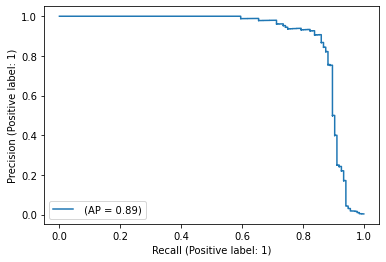

In [81]:
plot_precision_recall_curve(model4, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

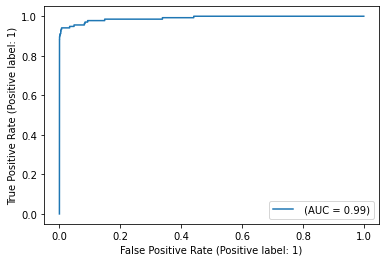

In [82]:
plot_roc_curve(model4, x_test, y_test, name = '')
plt.show()

# 5. Linear Regression Tomek links removal 

In [51]:
# import library
from imblearn.under_sampling import TomekLinks

In [52]:
t1 = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_t1, y_t1 = t1.fit_resample(x_train, y_train)

print('Original dataset shape for y  \n', y.Class.value_counts())
print('Resample dataset shape for y \n', y_t1.Class.value_counts())

Original dataset shape for y  
 0    284315
1       492
Name: Class, dtype: int64
Resample dataset shape for y 
 0    198995
1       356
Name: Class, dtype: int64


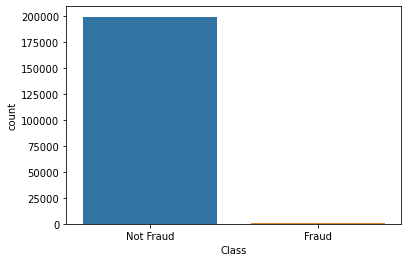

In [53]:
g = sns.countplot(y_t1['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

### Parameter Search

In [54]:
rnd_search.fit(x_t1, y_t1)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [55]:
print(rnd_search.best_params_)

{'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


### Fitting the model

In [57]:
classifier5 = xgboost.XGBClassifier(subsample = 0.6, n_estimators = 1000, min_child_weight = 5, max_depth = 9, learning_rate = 0.1, colsample_bytree = 0.6)
model5 = classifier5.fit(x_t1, y_t1)

[10:40:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluation

In [60]:
prediction5 = model5.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction5))

Accuracy Score:  0.9996254813150287


### Confusion Matrix

In [63]:
confusion_matrix(y_test, prediction5)

array([[85300,     7],
       [   25,   111]], dtype=int64)

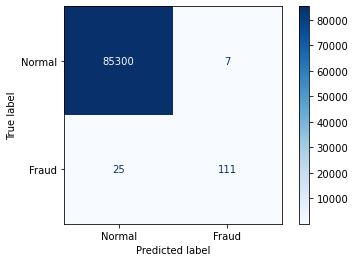

In [64]:
plot_confusion_matrix(model5, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [67]:
print(classification_report(y_test, prediction5, digits = 4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9407    0.8162    0.8740       136

    accuracy                         0.9996     85443
   macro avg     0.9702    0.9080    0.9369     85443
weighted avg     0.9996    0.9996    0.9996     85443



### Precision Recall Curve

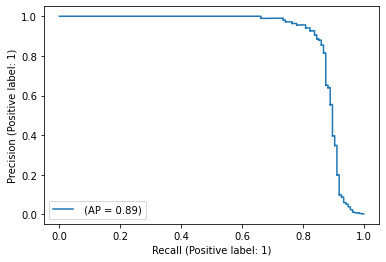

In [69]:
plot_precision_recall_curve(model5, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve

In [70]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

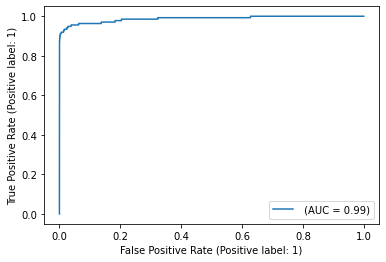

In [71]:
plot_roc_curve(model5, x_test, y_test, name = '')
plt.show()
#plt.plot([0,1], [0,1], c='b')